# Project Python for Data Analysis
### Diego & Erwan
#### This notebook contains the exploratory work we did on the dataset

## Import the needed libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Load data from the CSV file

In [4]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [4]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## Dataset statistical study

In [25]:
 df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
Gender                            2111 non-null object
Age                               2111 non-null float64
Height                            2111 non-null float64
Weight                            2111 non-null float64
family_history_with_overweight    2111 non-null object
FAVC                              2111 non-null object
FCVC                              2111 non-null float64
NCP                               2111 non-null float64
CAEC                              2111 non-null object
SMOKE                             2111 non-null object
CH2O                              2111 non-null float64
SCC                               2111 non-null object
FAF                               2111 non-null float64
TUE                               2111 non-null float64
CALC                              2111 non-null object
MTRANS                            2111 non-null object
NObey

## Study of the Target variable

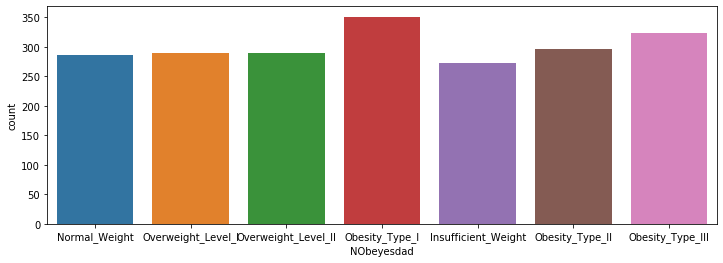

In [21]:
plt.figure(figsize=(12,4)) 
sns.countplot(df['NObeyesdad'], label="Count")  
plt.show()

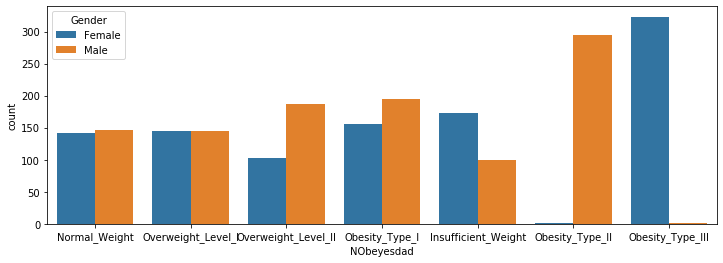

In [19]:
plt.figure(figsize=(12,4)) 
sns.countplot(data = df, x="NObeyesdad", hue="Gender")  
plt.show()


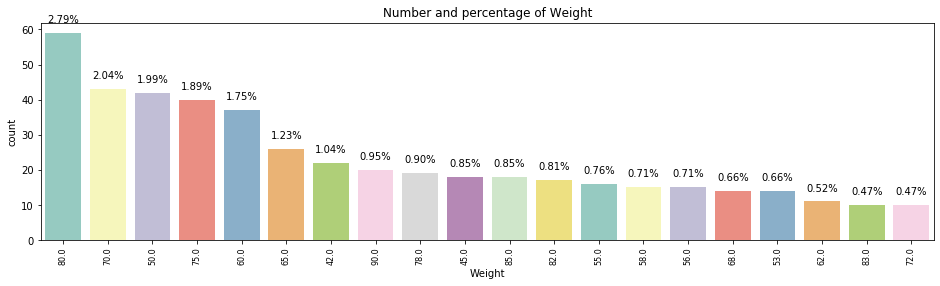

In [6]:
# Code inpired by Gabriel Preda

f, ax = plt.subplots(1,1, figsize=(16,4))
total = float(df.shape[0])
g = sns.countplot(df["Weight"], order = df["Weight"].value_counts().index[:20], palette='Set3')
g.set_title("Number and percentage of Weight")
plt.xticks(rotation=90, size=8)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(100*height/total),
            ha="center") 
plt.show()

In [7]:
target_df=df['NObeyesdad'].value_counts()
target_df_=pd.DataFrame(target_df)
target_df_["ratio"]=target_df_['NObeyesdad']*100/sum(target_df_['NObeyesdad'])
target_df_

,NObeyesdad,ratio
Obesity_Type_I,351,16.627191
Obesity_Type_III,324,15.348176
Obesity_Type_II,297,14.069162
Overweight_Level_II,290,13.737565
Overweight_Level_I,290,13.737565
Normal_Weight,287,13.595452
Insufficient_Weight,272,12.884889


In [9]:
df[df["NObeyesdad"]=="Obesity_Type_III"]["Gender"].value_counts()

Female    323
Male        1
Name: Gender, dtype: int64

## Study of the data repartition

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


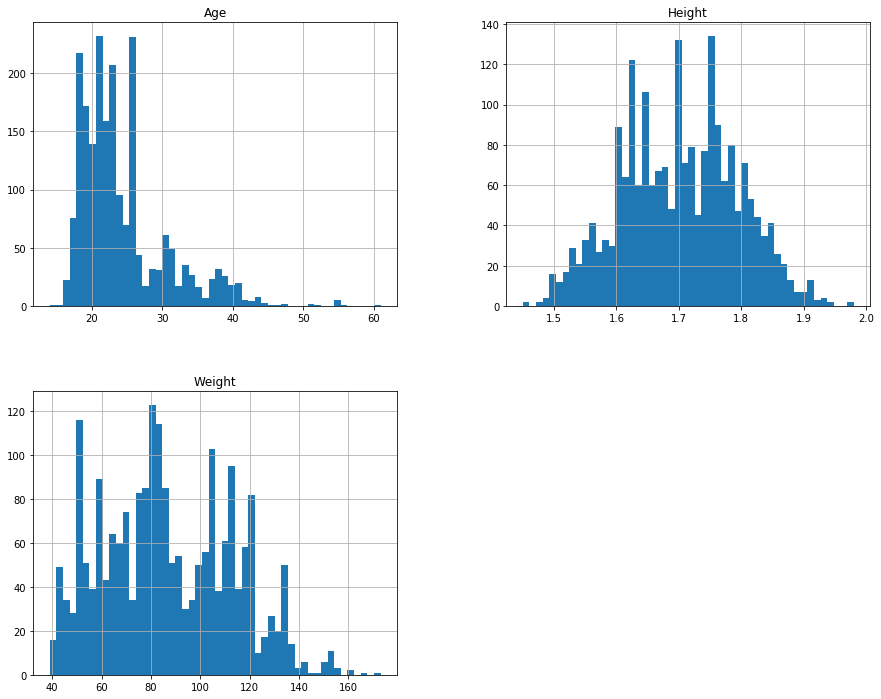

In [16]:
import matplotlib.pyplot as plt
print(df.columns)
df[["Age", "Height", "Weight"]].hist(bins=50, figsize=(15, 12))
plt.show()

# Correlation matrix

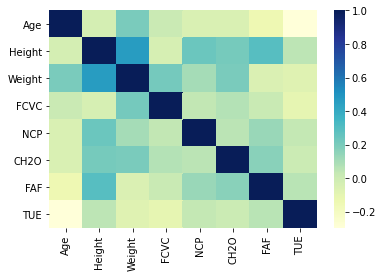

In [10]:
corr_matrix=df.corr()
ax = sns.heatmap(corr_matrix, cmap="YlGnBu")

# Others dataviz

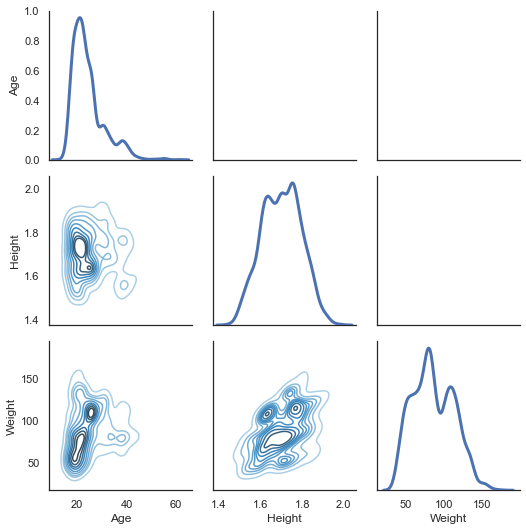

In [11]:
sns.set(style="white")
df2 = df.loc[:,['Age','Height','Weight']]
g = sns.PairGrid(df2, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

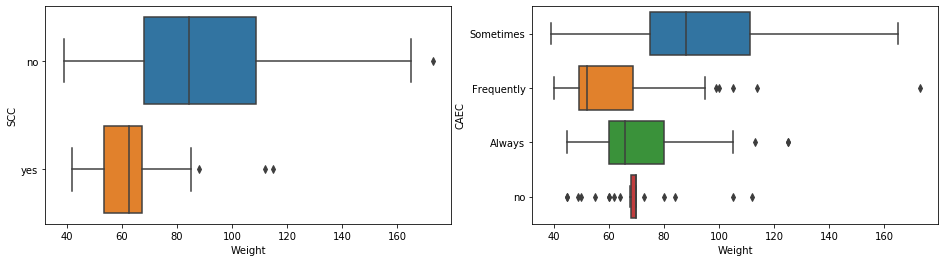

In [5]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.boxplot(x = 'Weight', y = 'SCC', data = df)
plt.subplot(122)
sns.boxplot(x = 'Weight', y = 'CAEC', data = df)
plt.show()